In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 



In [12]:
data = pd.read_csv('../datasets/titanic_data/train.csv')

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

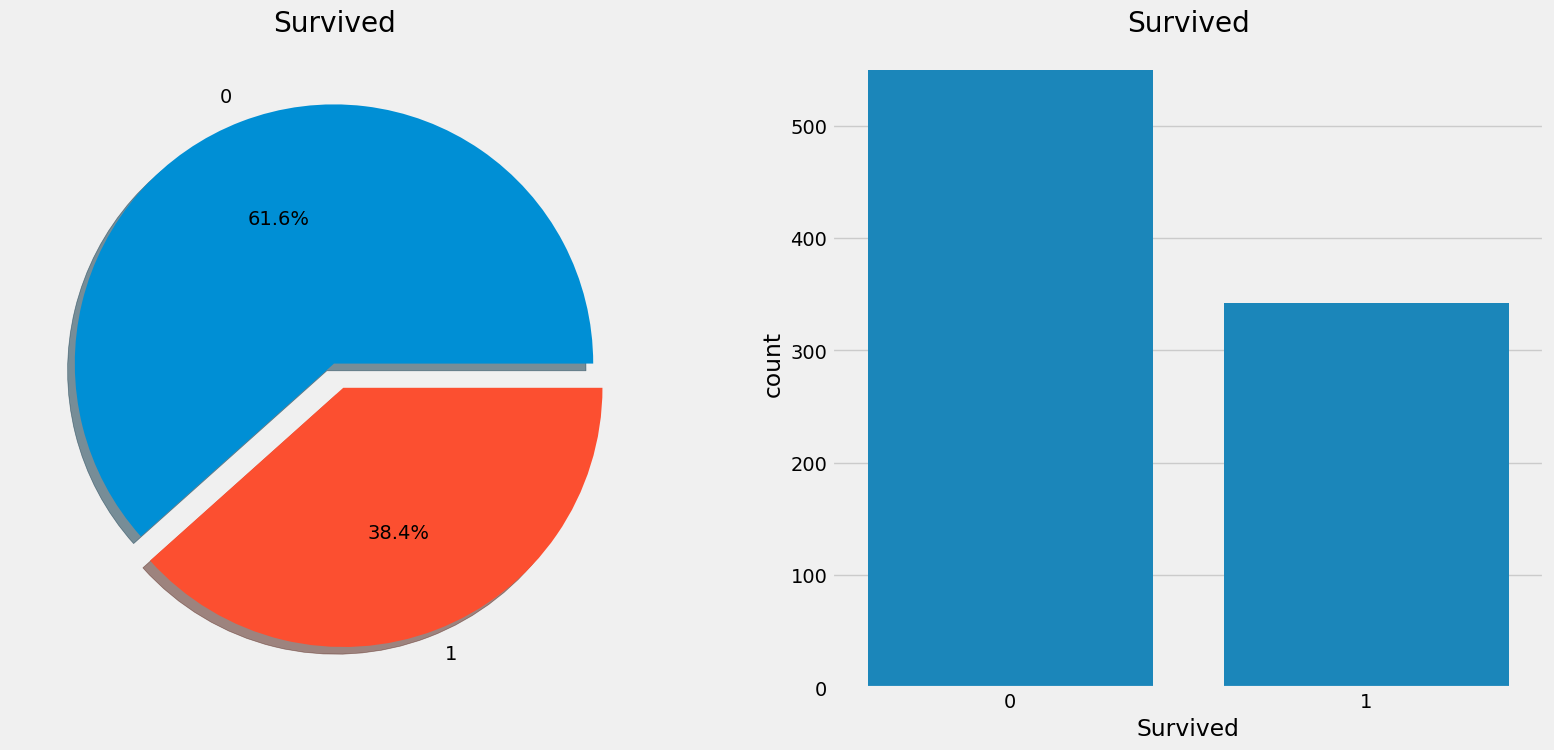

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [23]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

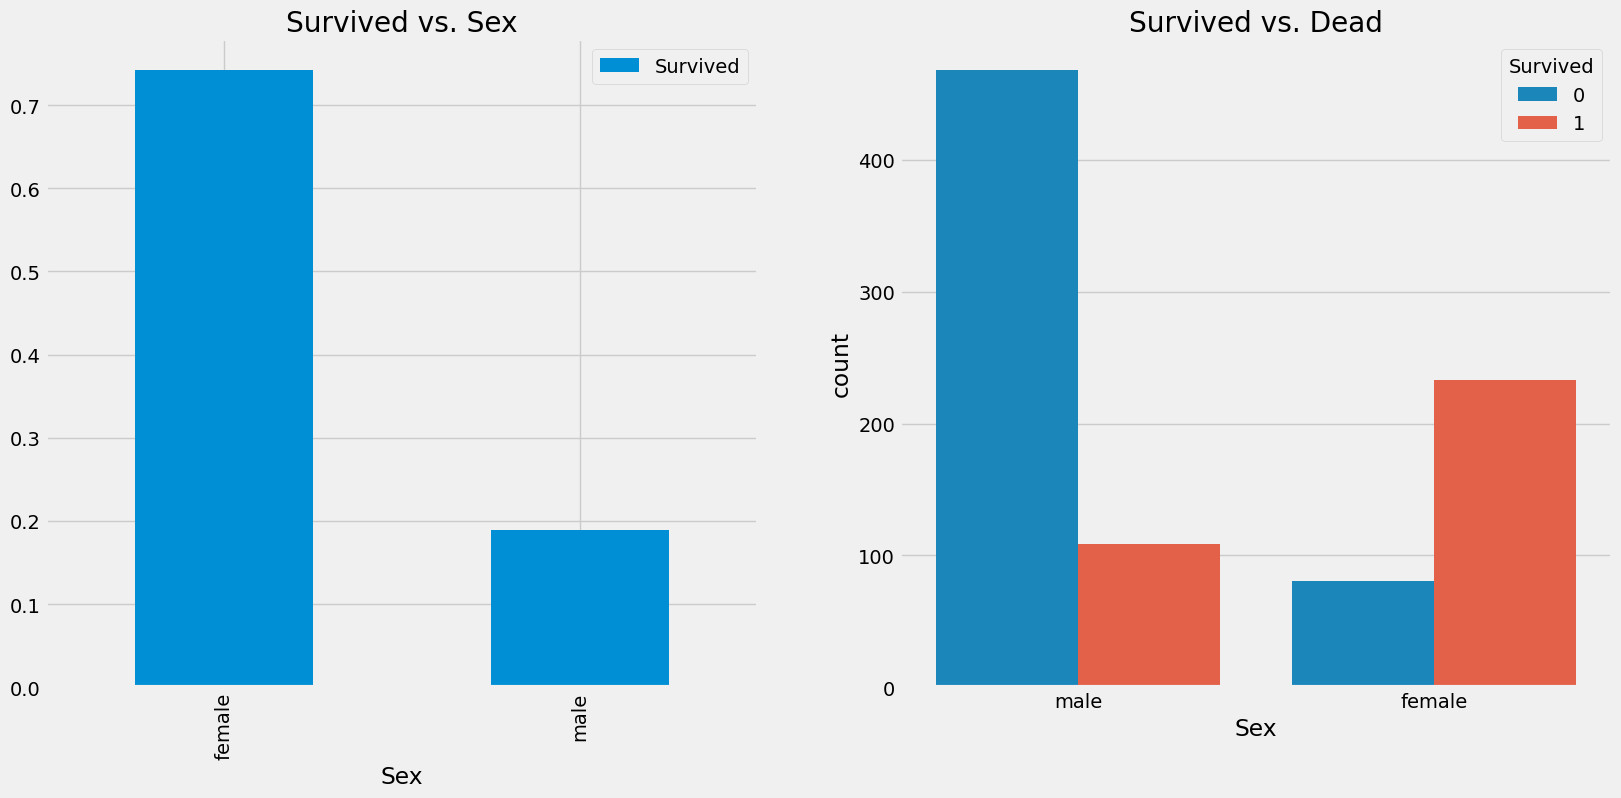

In [29]:
# categorical feature check
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')
sns.countplot(x= 'Sex', hue = 'Survived', data=data, ax=ax[1])
ax[1].set_title('Survived vs. Dead')
plt.show()


In [34]:
# ordinal feature check

pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient()


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


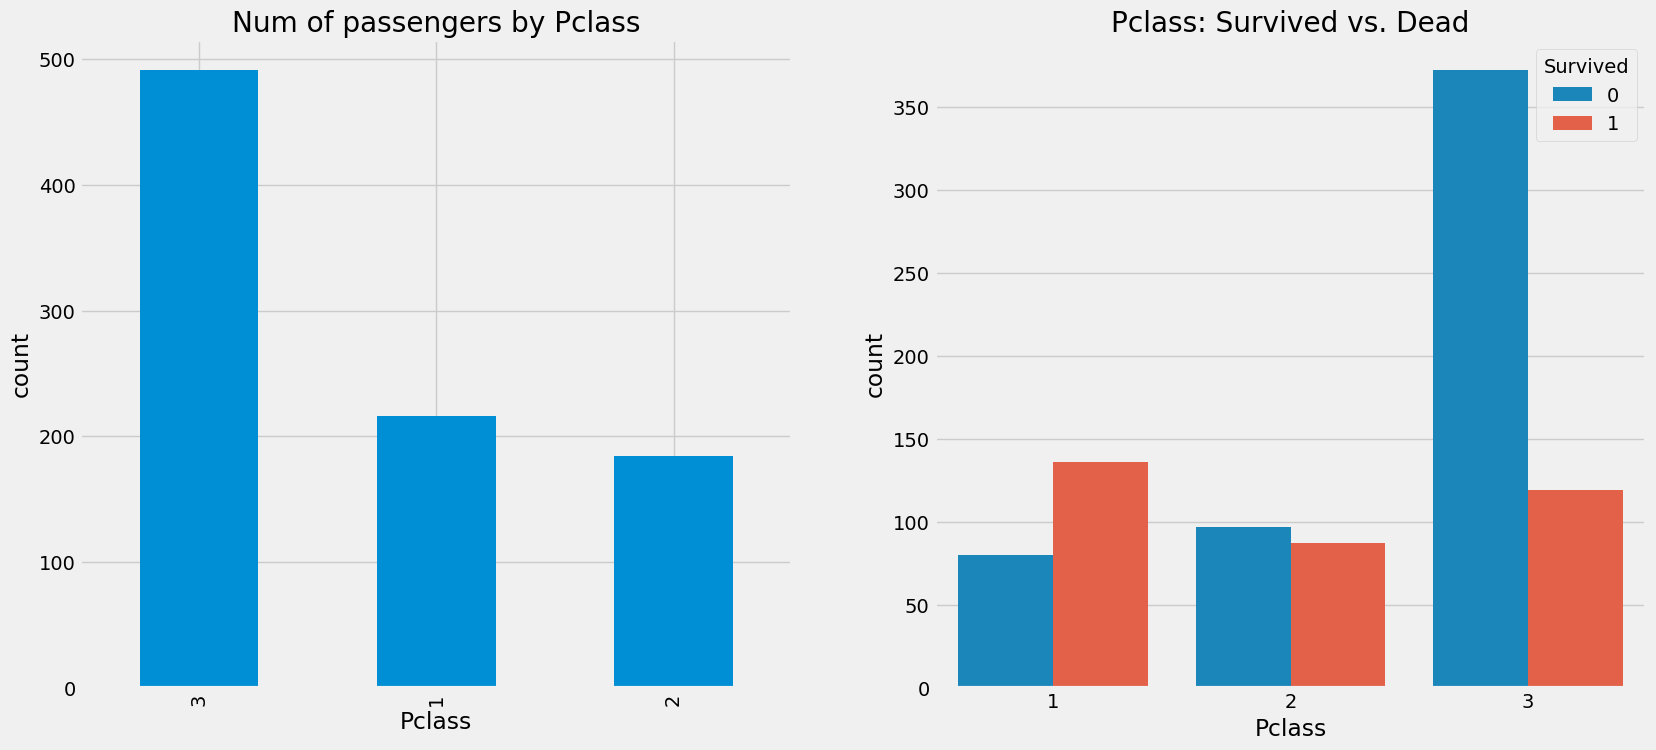

In [40]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Num of passengers by Pclass')
ax[0].set_ylabel('count')
sns.countplot(x='Pclass',hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead')
plt.show()

In [45]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient()

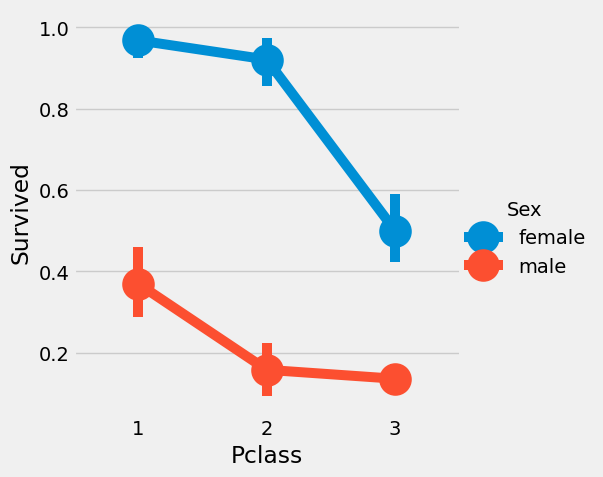

In [55]:
# factorplot() deprecated, use catplot() instead
# default value is strip, so change to kind='point' if needed

sns.catplot(x = 'Pclass',y = 'Survived', hue='Sex', data=data, kind='point')
plt.show()

In [63]:
# continuous feature 

print('Oldest passenger was', data['Age'].max(), 'years old')
print('Youngest passenger was', data['Age'].min(), 'years old')
print('Average passenger age was', data['Age'].mean(), 'years old')

Oldest passenger was 80.0 years old
Youngest passenger was 0.42 years old
Average passenger age was 29.69911764705882 years old


In [ ]:
# code referred from below
# https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic